In [1]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from torch.utils.data.dataset import TensorDataset
from torch.utils.data import DataLoader

In [2]:
#The building blocks are pytorch tensors. Similarly to tensorflow, pytorch need its own object
#to perform operations while tracing the weights for back-probagation.
#In more details, both are differentiable programming objects that can compute the gradient of a function.

x = torch.FloatTensor([3.8,4.2])
print('x.shape ',x.shape)
print('x[0] ', x[0])
print('x[1] ', x[1])

x.shape  torch.Size([2])
x[0]  tensor(3.8000)
x[1]  tensor(4.2000)


In [13]:
# Generate dataset for training

N_data = 1000
data_x = np.linspace(1.0, 10.0, N_data)[:, np.newaxis]
data_y = 5*np.sin(data_x) + 0.2*np.random.randn(N_data,1)
#data_y = 0.5*data_x + 0.2*np.random.randn(N_data,1)

Text(0, 0.5, 'Y')

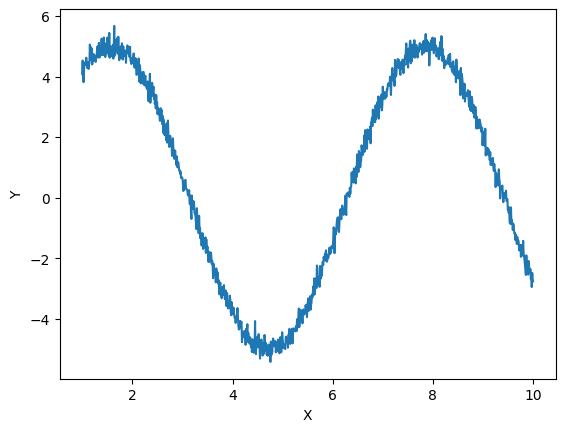

In [4]:
plt.plot( data_x.flatten(), data_y.flatten()  )
plt.xlabel('X')
plt.ylabel('Y')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [6]:
# Moving to pytorch as the DatasetObject expects as input pytorch arrays

x_train = torch.FloatTensor(X_train)
x_valid = torch.FloatTensor(X_test)

y_train = torch.FloatTensor(Y_train)
y_valid = torch.FloatTensor(Y_test)

print(x_train.shape,y_train.shape)

torch.Size([800, 1]) torch.Size([800, 1])


In [7]:
# A Dataset object is basically a wrapper around our (x,y) pairs
# If we ask for a particular index it will give us a single (x,y) pair

train_ds = TensorDataset(x_train,y_train)
valid_ds = TensorDataset(x_valid,y_valid)
train_ds[42]

(tensor([5.6306]), tensor([-2.6666]))

In [8]:
# Dataloader creation; used to batch together items for training, it returns multiple (x,y) every time you loop over it

dataloader = DataLoader(train_ds,batch_size=10,shuffle=True)

In [9]:
# Let's build one layer

my_first_layer = torch.nn.Linear(2,10,bias=True)

x = torch.FloatTensor([2,3.8])

# Printing the results associated to the layer. Since there is no training yet, random weights

my_first_layer(x)

tensor([-2.2663,  2.3265, -2.2359, -1.2246,  1.3274, -0.5564,  2.9968, -2.6307,
        -1.2954, -3.6115], grad_fn=<ViewBackward0>)

In [10]:
# One can look at the layer using the following code
for p in my_first_layer.parameters():
  print('----------')
  print(p)
  print(p.shape)
  print('----------')

----------
Parameter containing:
tensor([[-0.7039, -0.2070],
        [ 0.2983,  0.4767],
        [ 0.3550, -0.5985],
        [-0.3736, -0.0267],
        [ 0.4562,  0.2373],
        [-0.1710, -0.1066],
        [ 0.2752,  0.5239],
        [-0.4300, -0.3728],
        [ 0.4149, -0.4264],
        [-0.5323, -0.6645]], requires_grad=True)
torch.Size([10, 2])
----------
----------
Parameter containing:
tensor([-0.0720, -0.0816, -0.6715, -0.3759, -0.4867,  0.1908,  0.4554, -0.3541,
        -0.5050, -0.0216], requires_grad=True)
torch.Size([10])
----------


In [14]:
# Let's now build a ReLU activation function -- negative weghts are set to 0 and positive gets another value
activation1 = torch.nn.ReLU()

activation1( my_first_layer(x) )

tensor([0.0000, 2.3265, 0.0000, 0.0000, 1.3274, 0.0000, 2.9968, 0.0000, 0.0000,
        0.0000], grad_fn=<ReluBackward0>)

In [15]:
# Let's now define a new layer, and make things a bit more interesting. We build a model 2->10->1
# Note that we used relu activation for both layers

layer2 = torch.nn.Linear(10,1)
layer2(activation1( my_first_layer(x) ))

tensor([-0.0431], grad_fn=<ViewBackward0>)

In [23]:
# Note that the layer are supposed to work in tensorial form, this is needed to work in batches
x = torch.FloatTensor([[0.2],[0.4],[0.8]])
print('x.shape ',x.shape)

my_first_layer = torch.nn.Linear(1,10)
out = my_first_layer(x)
print('out shape ',out.shape)

x.shape  torch.Size([3, 1])
out shape  torch.Size([3, 10])


In [18]:
# Let's now make everything more professional
# Define the Neural Network Object we want to train

class Net(torch.nn.Module):
    def __init__(self): # this is standard in pytorch
        super(Net,self).__init__()
        #here we define what linear and activations we want to use
        self.layer1 = torch.nn.Linear(1,10)
        self.layer2 = torch.nn.Linear(10,40)
        self.layer3 = torch.nn.Linear(40,80)
        self.layer4 = torch.nn.Linear(80,40)
        self.layer5 = torch.nn.Linear(40,10)
        self.layer6 = torch.nn.Linear(10,1)
        self.activation1 = torch.nn.ReLU()
        self.activation2 = torch.nn.Tanh()

    def forward(self,x):

        out = self.layer1(x)
        out = self.activation1(out)
        out = self.layer2(out)
        out = self.activation1(out)
        out = self.layer3(out)
        out = self.activation1(out)
        out = self.layer4(out)
        out = self.activation1(out)
        out = self.layer5(out)
        out = self.activation1(out)
        out = self.layer6(out)
        #out = self.activation2(out)

        return out

In [19]:
# ... and this code creates a neural net based on the definition above
net = Net()
net

Net(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=40, bias=True)
  (layer3): Linear(in_features=40, out_features=80, bias=True)
  (layer4): Linear(in_features=80, out_features=40, bias=True)
  (layer5): Linear(in_features=40, out_features=10, bias=True)
  (layer6): Linear(in_features=10, out_features=1, bias=True)
  (activation1): ReLU()
  (activation2): Tanh()
)

In [20]:
x.shape

torch.Size([3, 1])

In [24]:
net(x)

tensor([[-0.2271],
        [-0.2221],
        [-0.2140]], grad_fn=<AddmmBackward0>)

In [25]:
# Pick up the Adam optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

In [26]:
def loss_func(true,pred):
    return torch.sum((true-pred)**2)
loss_func_pre = torch.nn.MSELoss()

#loop over epochs
for epoch in  range(100):
    #loop over batches
    for x,y in dataloader:
        optimizer.zero_grad()
        output = net(x)
        loss = loss_func_pre(y,output)
        loss.backward()
        optimizer.step()

torch.Size([800, 1])


Text(0, 0.5, 'Y')

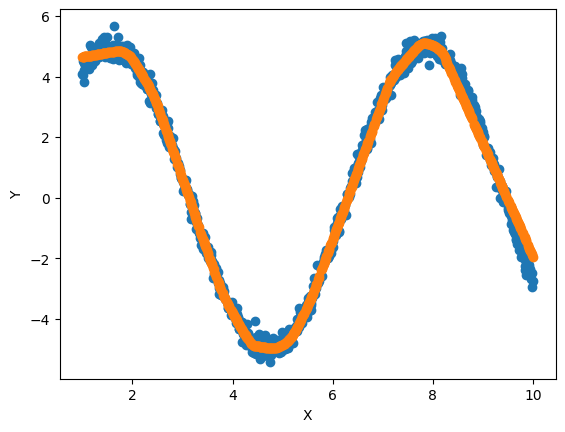

In [27]:
#let's plot the result now
print(x_train.shape)
data_pred=net(x_train)
plt.scatter(x_train, y_train )
plt.scatter(x_train,data_pred.detach().numpy() )
plt.xlabel('X')
plt.ylabel('Y')

In [28]:
# Bonus -> let's make the regression model more interesting
# We are estimating now only the central value of the model
# But this is a limitation of the model, let's see how to estimate an uncertainty
# Digression on uncertanties -> tipically we have several sources of uncertainty, stocasthics and epistemic,
# This method only copes with the first one, in many physics application this is sufficient

class DeepNormal(torch.nn.Module):

    def __init__(self, n_inputs, n_hidden):
        super().__init__()

        # Shared parameters
        self.shared_layer = torch.nn.Sequential(
            torch.nn.Linear(n_inputs, n_hidden),
            torch.nn.ReLU(),
            #torch.nn.Dropout(),
        )

        # Mean parameters
        self.mean_layer = torch.nn.Sequential(
            torch.nn.Linear(n_hidden, n_hidden),
            torch.nn.ReLU(),
            #torch.nn.Dropout(),
            torch.nn.Linear(n_hidden, 1),
        )

        # Standard deviation parameters
        self.std_layer = torch.nn.Sequential(
            torch.nn.Linear(n_hidden, n_hidden),
            torch.nn.ReLU(),
            #torch.nn.Dropout(),
            torch.nn.Linear(n_hidden, 1),
            torch.nn.Softplus(),  # enforces positivity
        )

    def forward(self, x):
        # Shared embedding
        shared = self.shared_layer(x)

        # Parametrization of the mean
        mu = self.mean_layer(shared)

        # Parametrization of the standard deviation
        sigma = self.std_layer(shared)

        # This is the function that will define a ditribution
        # We now have two different output and we can use them to build a gaussian probability where mu and sigma
        # Boths depends on the input variables
        return torch.distributions.Normal(mu, sigma)

In [29]:
# Note that now the loss function we want to minimize is the log-likelihood itself!
# Assuming that the physics quantity of interest is known, this can be done easily

def compute_loss(normal_dist, y):
    neg_log_likelihood = -normal_dist.log_prob(y)
    return torch.mean(neg_log_likelihood)

In [30]:
model = DeepNormal(1,60)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
for epoch in range(200):
    #loop over batches
    for x,y in dataloader:
        optimizer.zero_grad()
        output = model(x)
        loss = compute_loss(output,y)
        loss.backward()
        optimizer.step()

In [31]:
model.eval()
# evaluate model on x with shape (N, M)
normal_dist = model(x_train)
# retrieve prediction mean with shape (N,)
mean = normal_dist.mean
# retrieve standard deviation with shape (N,)
std = normal_dist.stddev

Text(0, 0.5, 'Y')

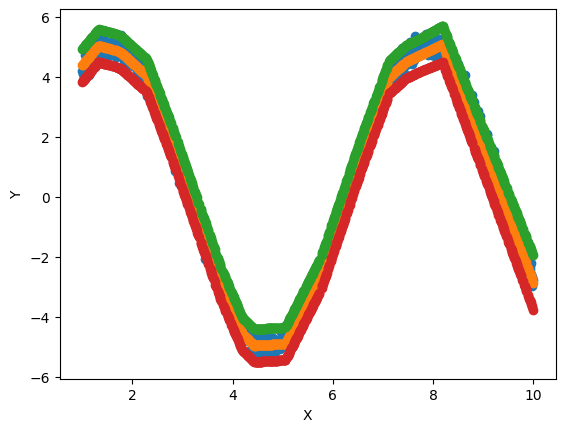

In [ ]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,mean.detach().numpy())
plt.scatter(x_train,mean.detach().numpy()+2*std.detach().numpy())
plt.scatter(x_train,mean.detach().numpy()-2*std.detach().numpy())
plt.xlabel('X')
plt.ylabel('Y')